In [4]:
# system tools
import os
import sys

#sys.path.append(os.path.join(".."))
import argparse

# working with images
import cv2

# data analysis
import numpy as np
from numpy.linalg import norm

# tensorflow
import keras
import tensorflow
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import (load_img, 
                                                  img_to_array)
from tensorflow.keras.applications.vgg16 import (VGG16, 
                                                 preprocess_input)

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# knn
from sklearn.neighbors import NearestNeighbors


ModuleNotFoundError: No module named 'keras'

In [2]:
arg = "/image_0001.jpg"

In [3]:
model = VGG16(weights='imagenet', 
                  include_top=False,
                  pooling='avg',
                  input_shape=(224, 224, 3))

NameError: name 'VGG16' is not defined

In [7]:
root_dir = os.path.join("..", "input", "flowers")
filenames = [root_dir + "/" + name for name in sorted(os.listdir(root_dir))]

In [8]:
feature_list = [] # create an empty list for all the features to go into
for files in filenames: #iterate over all files
    input_shape = (224, 224, 3) # Define input image shape which fits VGG16
    # load image from file path
    img = load_img(files, target_size=(input_shape[0], # <----------------------------------- ERROR
                                        input_shape[1]))    
    img_array = img_to_array(img) # convert to array    
    expanded_img_array = np.expand_dims(img_array, axis=0) # expand to fit dimensions
    preprocessed_img = preprocess_input(expanded_img_array) # preprocess image
    features = model.predict(preprocessed_img, verbose=False) # create feature representations using the predict function
    flattened_features = features.flatten() # flatten
    normalized = flattened_features / norm(features) # normalize

    feature_list.append(normalized) # add normalized features to list

In [9]:
neighbors = NearestNeighbors(n_neighbors=10, # find the 10 most similar images
                            algorithm='brute', # using brute force by calculate the cosine similarity to every other image in the dataset. This is fine because we have a relatively small dataset
                            metric='cosine').fit(feature_list)

In [10]:
distances, indices = neighbors.kneighbors([feature_list[0]]) # <---------- changed arg to 0

In [11]:
idxs = [] # save indices in a list
for i in range(1,6): #pass by the most similar flower, which is the target flower instead, and take the next five results
    idxs.append(indices[0][i])

In [23]:
idxs

[36, 15, 35, 16, 48]

In [42]:
(filenames[idxs[0]])

'../input/flowers/image_0037.jpg'

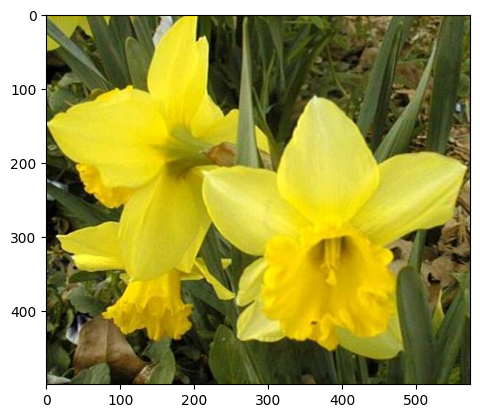

In [24]:
plt.imshow(mpimg.imread(filenames[idxs[0]]))

In [46]:
filelist

['../input/flowers/image_0037.jpg']

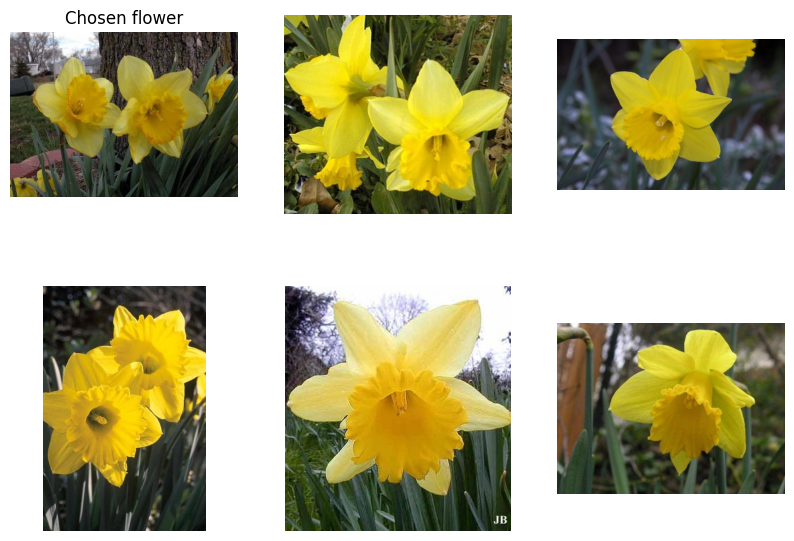

In [49]:
#creating a grid of the results
fig = plt.figure(figsize=(10, 7)) 

# setting the number of rows and columns
rows = 2
columns = 3

counter = 2 # counter will be used to indicate where to place the image in the grid

flower_number = 0 # counter for going through the similar flowers

#creating a filepath to the specific image we are working with. the .jpg can be replaced with another from the same directory
filepath = os.path.join("..", "input", "flowers", "image_0001.jpg")

image_flower = cv2.imread(filepath)
fig.add_subplot(rows, columns, 1) # add new plot to grid
plt.imshow(image_flower[:,:,::-1]) # showing flower, switching from BGR to RGB
plt.axis('off') # dont show axes
plt.title("Chosen flower")

filelist = [] # create list of 5 most similar flowers' filepaths
filelist.append(filenames[idxs[0]]) # grab filenames from list based on their indices
filelist.append(filenames[idxs[1]])
filelist.append(filenames[idxs[2]])
filelist.append(filenames[idxs[3]])
filelist.append(filenames[idxs[4]])

for flower in filelist:
    fig.add_subplot(rows, columns, counter) # add new plot to grid
    plt.imshow(mpimg.imread(filelist[flower_number])) # showing flower
    plt.axis('off') # dont show axes
    counter += 1
    flower_number += 1

plt.savefig('../output/results_vgg16_new.png') # save results
